In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
print(f"Number of records:",df.shape[0])
print(f"Number of features:",df.shape[1])

Number of records: 918
Number of features: 12


In [8]:
print("Columns are as follows:",df.columns)

Columns are as follows: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [4]:
print("Data types:\n", df.dtypes)

Data types:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
print("Unique values:\n", df.nunique())

Unique values:
 Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
print("Summary statistics:\n", df.describe())

Summary statistics:
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [9]:
abnormal_values = {
    'RestingBP': df[df['RestingBP'] <= 0],
    'Cholesterol': df[df['Cholesterol'] <= 0],
    'MaxHR': df[df['MaxHR'] <= 0],
    'Oldpeak': df[df['Oldpeak'] < 0]
}
print("Abnormal values in RestingBP:\n", abnormal_values['RestingBP'])
print("Abnormal values in Cholesterol:\n", abnormal_values['Cholesterol'])
print("Abnormal values in MaxHR:\n", abnormal_values['MaxHR'])
print("Abnormal values in Oldpeak:\n", abnormal_values['Oldpeak'])

Abnormal values in RestingBP:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  
Abnormal values in Cholesterol:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0     

In [10]:
categorical_values = {
    'Sex': df['Sex'].unique(),
    'ChestPainType': df['ChestPainType'].unique(),
    'FastingBS': df['FastingBS'].unique(),
    'RestingECG': df['RestingECG'].unique(),
    'ExerciseAngina': df['ExerciseAngina'].unique(),
    'ST_Slope': df['ST_Slope'].unique(),
    'HeartDisease': df['HeartDisease'].unique()
}
print("Categorical values:\n", categorical_values)

Categorical values:
 {'Sex': array(['M', 'F'], dtype=object), 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object), 'FastingBS': array([0, 1]), 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object), 'ExerciseAngina': array(['N', 'Y'], dtype=object), 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object), 'HeartDisease': array([0, 1])}


In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                    Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


In [13]:
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].median())

df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

abnormal_values_after_handling = {
    'RestingBP': df[df['RestingBP'] <= 0],
    'Cholesterol': df[df['Cholesterol'] <= 0]
}
print("Abnormal values in RestingBP after handling:\n", abnormal_values_after_handling['RestingBP'])
print("Abnormal values in Cholesterol after handling:\n", abnormal_values_after_handling['Cholesterol'])

Abnormal values in RestingBP after handling:
 Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Abnormal values in Cholesterol after handling:
 Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])

print(df['AgeGroup'].value_counts())

AgeGroup
50-60    381
40-50    223
60-70    197
30-40     88
70+       24
<30        5
Name: count, dtype: int64


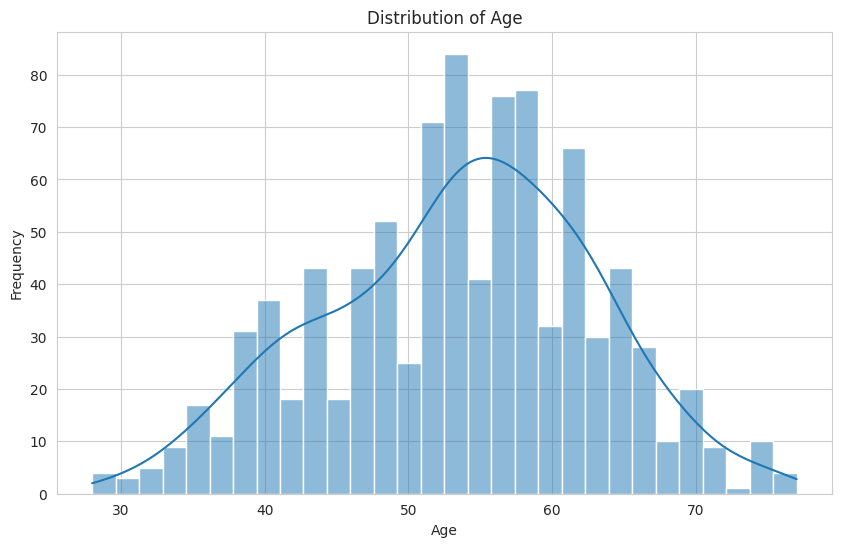

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

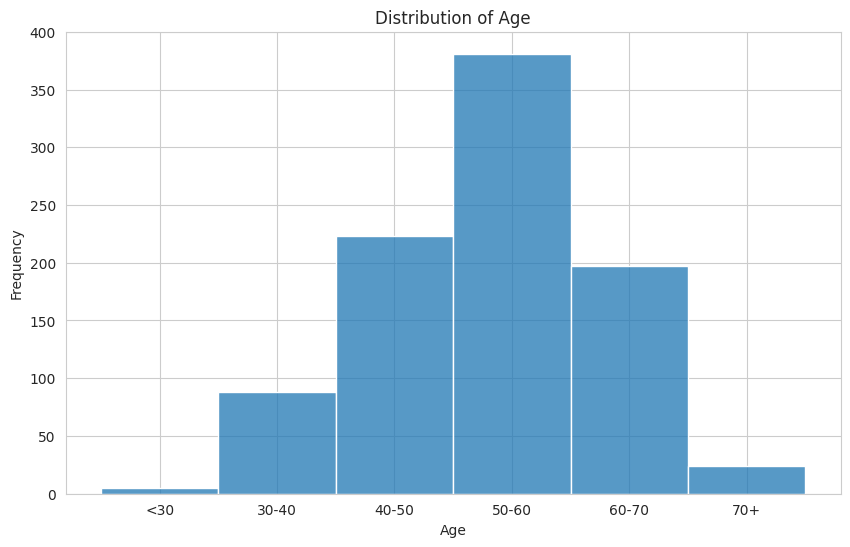

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AgeGroup'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


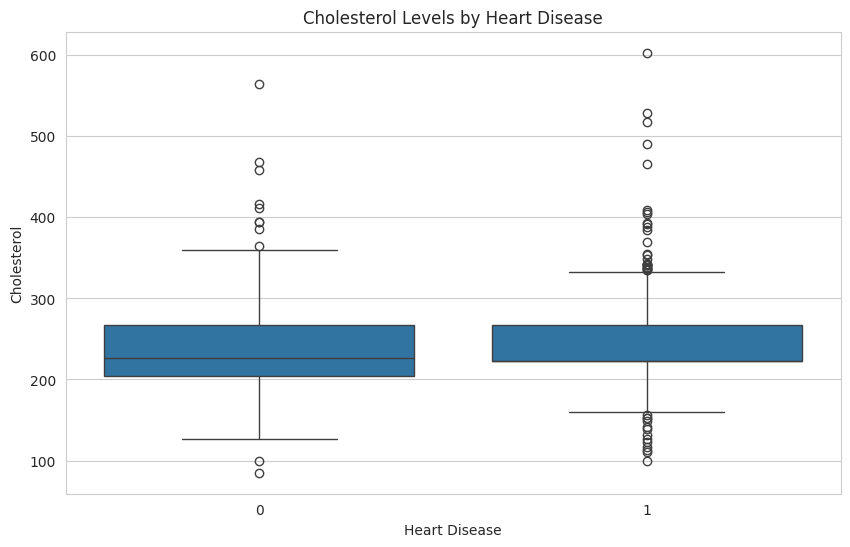

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

/tmp/ipykernel_80/218396869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChestPainType', data=df, palette='viridis')


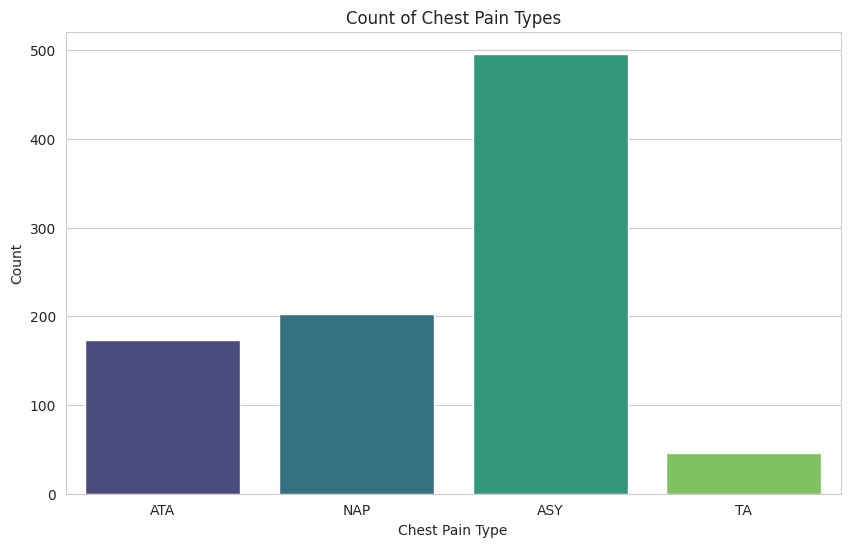

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', data=df, palette='viridis')
plt.title('Count of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

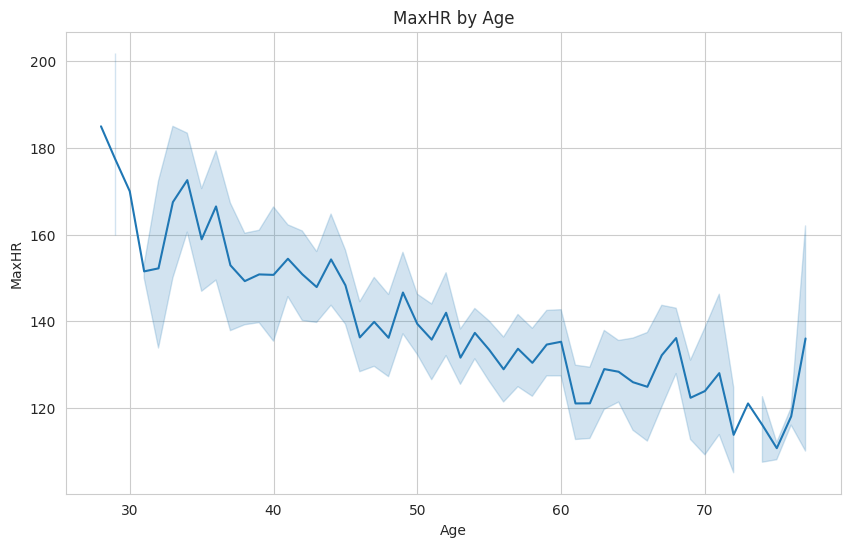

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='MaxHR', data=df)
plt.title('MaxHR by Age')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()


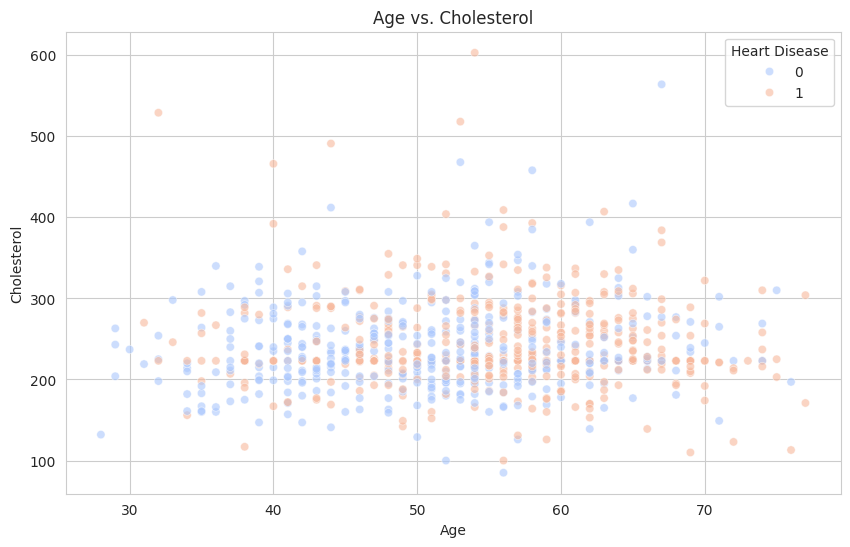

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol', hue='HeartDisease', data=df, palette='coolwarm', alpha=0.6)
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

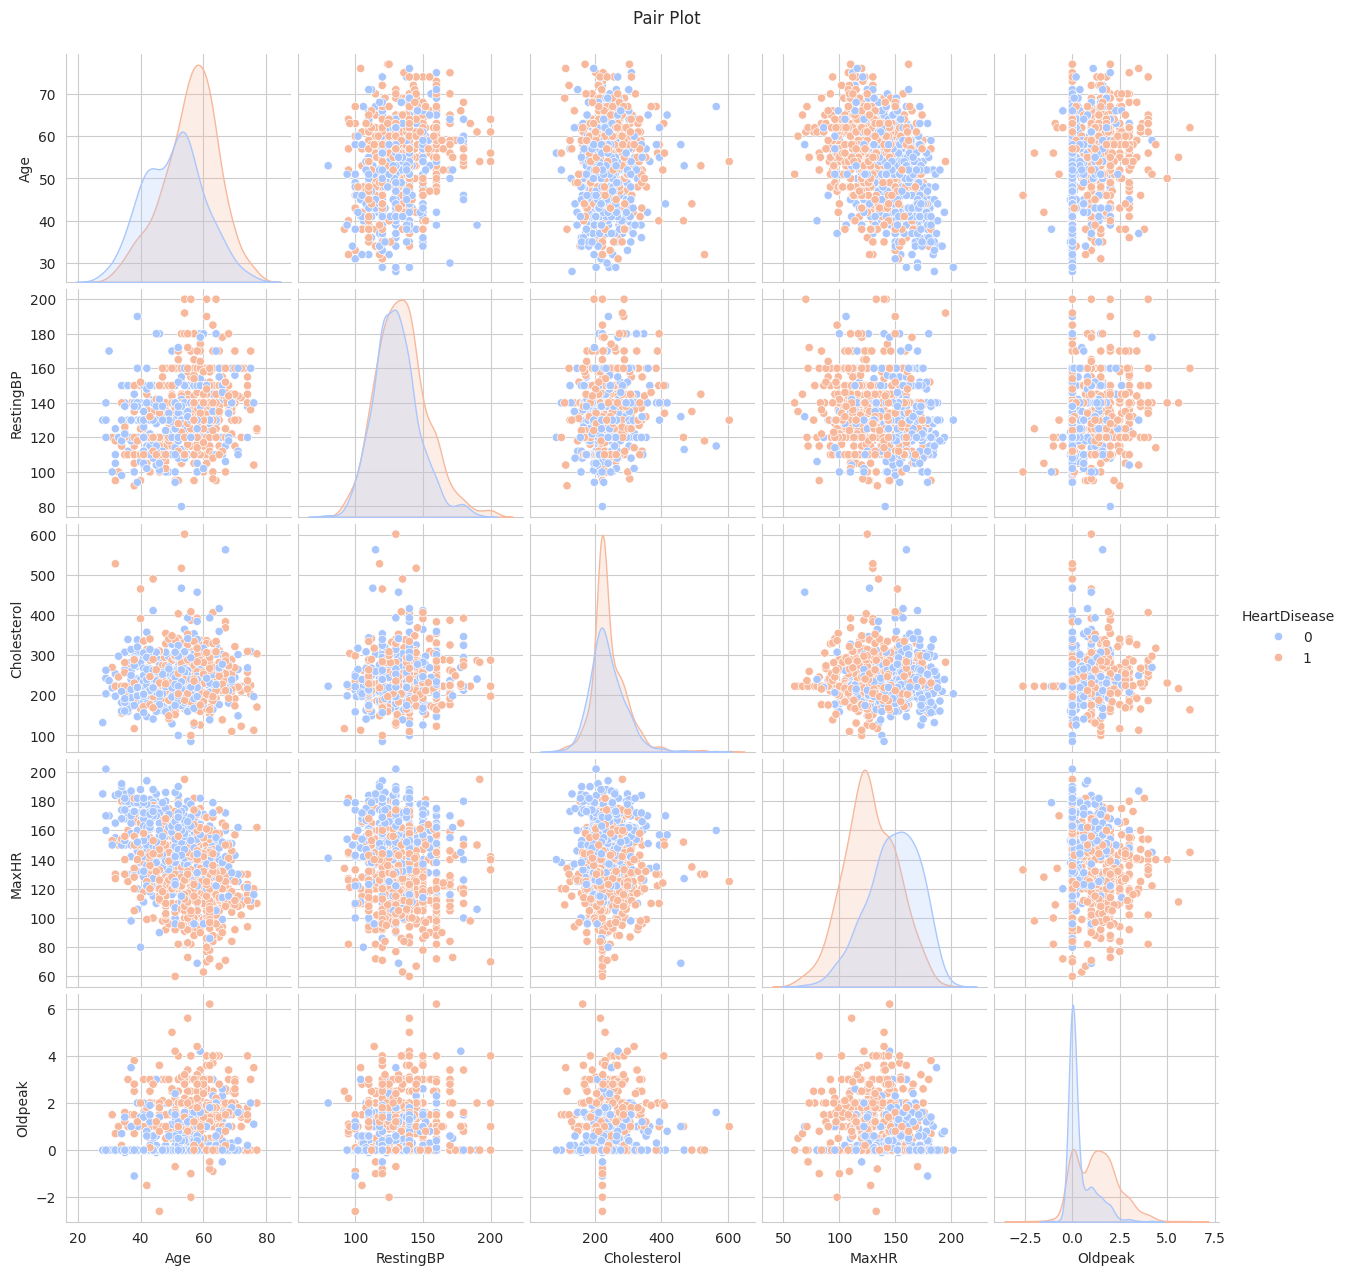

In [22]:
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease', palette='coolwarm')
plt.suptitle('Pair Plot', y=1.02)
plt.show()
